# Dependancies and Dataset
## Importing dependancies

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Reading and preparation of data

In [2]:
df=pd.read_csv('/content/train (1).csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Visualization

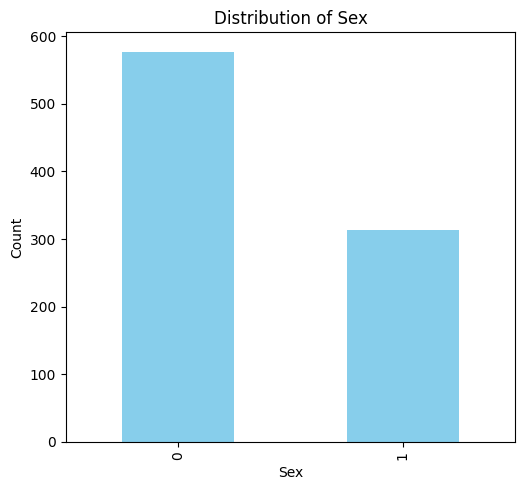

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Sex'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

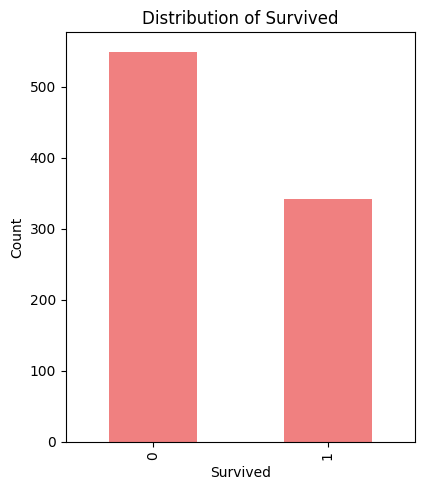

In [26]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 2)
df['Survived'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Processing Data

In [28]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [30]:
df['Sex'].value_counts()


,count
Sex,
0,577
1,314


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df.drop(['PassengerId','Ticket','Cabin','Name'],axis=1,inplace=True)

In [7]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [10]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [11]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [13]:
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [14]:
X = df.drop(columns="Survived")
y = df["Survived"]

# Spliting Data into Train/Test

In [15]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [17]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,0,45.5,0,0,28.5000,0
733,2,0,23.0,0,0,13.0000,0
382,3,0,32.0,0,0,7.9250,0
704,3,0,26.0,1,0,7.8542,0
813,3,1,6.0,4,2,31.2750,0
...,...,...,...,...,...,...,...
106,3,1,21.0,0,0,7.6500,0
270,1,0,NaN,0,0,31.0000,0
860,3,0,41.0,2,0,14.1083,0
435,1,1,14.0,1,2,120.0000,0


# Apply Column Transformer

In [18]:
num=['Age','Sex','Pclass','SibSp','Fare','Embarked']

In [19]:
num_tra=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),('sc',StandardScaler())])

In [20]:
trans=ColumnTransformer(transformers=[('numt',num_tra,num)],remainder='drop')

In [21]:
model={'lr':LogisticRegression(max_iter=1000),'rf':RandomForestClassifier(n_estimators=100, random_state=42)}

## Train Model and Predict

In [57]:
for i,j in model.items():
  pipe=Pipeline(steps=[('trans',trans),('model',j)])
  mod=pipe.fit(X_train,y_train)
  pred=mod.predict(x_test)
  print(accuracy_score(y_test,pred))
  print(classification_report(y_test, pred))
  print(confusion_matrix(y_test, pred))

0.7932960893854749
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

[[88 17]
 [20 54]]
0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[92 13]
 [19 55]]


In [58]:
pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [50]:
y_data_frame=pd.DataFrame(pred)

In [51]:
y_data_frame

,0
0,0
1,0
2,0
3,1
4,0
...,...
174,0
175,0
176,0
177,1


<Axes: xlabel='0', ylabel='count'>

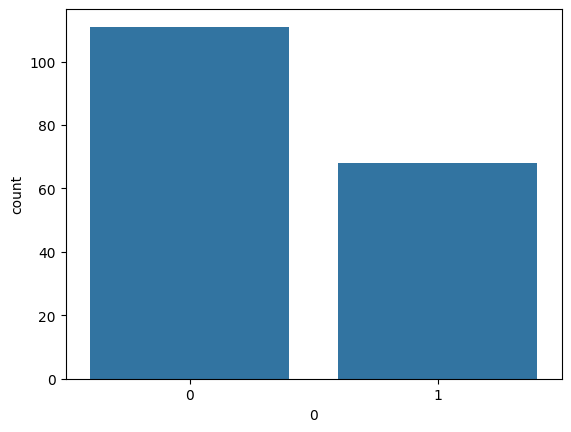

In [52]:
sns.countplot(x=y_data_frame[0])